# Exploratory Data Analysis

On the dataset_cleaned_heartless.pkl file

In [6]:
# packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
import os

from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

In [7]:
dataset_folders = [
    Path('dataset_cleaned_heartless_sampled_20230927').resolve(),
    Path('dataset_cleaned_heartless_sampled_20231028').resolve()
]

target_pkls = []
for folder in dataset_folders:
    for root, dirs, files in os.walk(folder):
        sub_target_pkls = list(map(lambda f: Path(root, f), files))
        sub_target_pkls = [p for p in sub_target_pkls if p.suffix == '.pkl' and p.stem.find('joincleanedchunks') != -1]

        target_pkls.extend(sub_target_pkls)
        break   # only one-level

print(len(target_pkls))
print()
for pkl in target_pkls:
    print(pkl)

2

/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/sa_hkuchatgpt/dataset_cleaned_heartless_sampled_20230927/dataset_cleaned_heartless_sampled_20230927_joincleanedchunks_20231009.pkl
/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/sa_hkuchatgpt/dataset_cleaned_heartless_sampled_20231028/dataset_cleaned_heartless_sampled_20231028_joincleanedchunks_20231129.pkl


In [8]:
# concat them

dataset = pd.concat([pd.read_pickle(p) for p in target_pkls])

dataset

,dataset_index,app_id,app_name,review_text,review_score,review_votes,response,total_token_used
0,949538,212680,FTL: Faster Than Light,"Amazing Game! Great Gameplay, and Great Re-pla...",1,0,"{\n ""positive"": 1.0,\n ""neutral"": 0.0,\n ""n...",150
1,417579,19680,Alice: Madness Returns,This game is fantastic! It is both fun to pla...,1,0,"{\n ""positive"": 1.0,\n ""neutral"": 0.0,\n ""n...",195
2,2140029,238460,BattleBlock Theater,"Dripping with fun, oozing with style, practica...",1,0,"{""positive"": 1.0, ""neutral"": 0.0, ""negative"": ...",155
3,491994,201810,Wolfenstein: The New Order,Great story-driven game - one of the better st...,1,0,"{""positive"": 1.0, ""neutral"": 0.0, ""negative"": ...",149
4,3303632,272010,Aveyond 3-1: Lord of Twilight,Haven't played much of it yet but it seems lik...,-1,0,"{""positive"": 0.0, ""neutral"": 0.0, ""negative"": ...",260
...,...,...,...,...,...,...,...,...
6487,3379127,275850,No Man's Sky,I bought this game now im sad.,-1,1,"{""positive"": 0, ""neutral"": 0, ""negative"": 1}",119
6488,2894780,253710,theHunter Classic,The worst kind of Free to Play I've ever seen....,-1,0,"{""positive"": 0.0, ""neutral"": 0.0, ""negative"": ...",201
6489,4007720,311340,METAL GEAR SOLID V: GROUND ZEROES,"They took the prologue of the Phantom pain, re...",-1,1,"{""positive"": 0.1, ""neutral"": 0.4, ""negative"": ...",412
6490,1316956,220260,Farming Simulator 2013,i wished it would work,-1,0,"{""positive"": 0.0, ""neutral"": 0.5, ""negative"": ...",126


In [9]:
dataset['review_text'] = dataset['review_text'].astype('str')

dataset = dataset.drop_duplicates(keep='first')

# replace -1 to 0
# then 0 = negative, 1 = positive
# for easier processing
dataset['review_score'] = dataset['review_score'].replace(-1, 0)

# 4891928 -> 4891746 (some rows have all whitespaces)
dataset['num_of_words'] = dataset['review_text'].apply(lambda x:len(str(x).split()))
dataset = dataset[dataset['num_of_words'] > 0]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13530 entries, 0 to 6491
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dataset_index     13530 non-null  int64 
 1   app_id            13530 non-null  int64 
 2   app_name          13530 non-null  object
 3   review_text       13530 non-null  object
 4   review_score      13530 non-null  int64 
 5   review_votes      13530 non-null  int64 
 6   response          13530 non-null  object
 7   total_token_used  13530 non-null  int64 
 8   num_of_words      13530 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.0+ MB


In [16]:
# dataset_heartless_path = Path('../dev-workspace/dataset/sa/dataset_cleaned_heartless.pkl').resolve()
# print(dataset_heartless_path)

# dataset_heartless = pd.read_pickle(dataset_heartless_path)
# # dataset = dataset.sample(frac=p)      # no sampling is needed

# # convert the text to string object
# dataset_heartless['review_text'] = dataset_heartless['review_text'].astype('str')

# # drop any duplicate just in case
# dataset_heartless = dataset_heartless.drop_duplicates(keep='first')

# # replace -1 to 0
# # then 0 = negative, 1 = positive
# # for easier processing
# dataset_heartless['review_score'] = dataset_heartless['review_score'].replace(-1, 0)

# # 4891928 -> 4891746 (some rows have all whitespaces)
# dataset_heartless['num_of_words'] = dataset_heartless['review_text'].apply(lambda x:len(str(x).split()))
# dataset_heartless = dataset_heartless[dataset_heartless['num_of_words'] > 0]

# dataset_heartless.info()

/Users/michaelcheng/Documents/MyDocs/HKU/COMP4801 FYP/FYP/NLP/dev-workspace/dataset/sa/dataset_cleaned_heartless.pkl
<class 'pandas.core.frame.DataFrame'>
Index: 4891746 entries, 0 to 4891927
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   index         int64 
 1   app_id        int64 
 2   app_name      object
 3   review_text   object
 4   review_score  int64 
 5   review_votes  int64 
 6   num_of_words  int64 
dtypes: int64(5), object(2)
memory usage: 298.6+ MB


In [10]:
dataset.head()

,dataset_index,app_id,app_name,review_text,review_score,review_votes,response,total_token_used,num_of_words
0,949538,212680,FTL: Faster Than Light,"Amazing Game! Great Gameplay, and Great Re-pla...",1,0,"{\n ""positive"": 1.0,\n ""neutral"": 0.0,\n ""n...",150,16
1,417579,19680,Alice: Madness Returns,This game is fantastic! It is both fun to pla...,1,0,"{\n ""positive"": 1.0,\n ""neutral"": 0.0,\n ""n...",195,55
2,2140029,238460,BattleBlock Theater,"Dripping with fun, oozing with style, practica...",1,0,"{""positive"": 1.0, ""neutral"": 0.0, ""negative"": ...",155,24
3,491994,201810,Wolfenstein: The New Order,Great story-driven game - one of the better st...,1,0,"{""positive"": 1.0, ""neutral"": 0.0, ""negative"": ...",149,23
4,3303632,272010,Aveyond 3-1: Lord of Twilight,Haven't played much of it yet but it seems lik...,0,0,"{""positive"": 0.0, ""neutral"": 0.0, ""negative"": ...",260,113


We will see the ratio between positive and negative reviews

In [11]:
temp = dataset.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_score',ascending=True)
temp.style.background_gradient(cmap='Purples')

,review_score,review_text
0,0,7580
1,1,5950


In [12]:
print("Ratio between positive and negative comments: {:.8}".format(
    len(dataset[dataset['review_score'] == 0]) / float(len(dataset[dataset['review_score'] == 1]))
))

Ratio between positive and negative comments: 1.2739496


How about the distribution of length of reviews

In both positive and negative comments respectively

In [14]:
# first have all comments together

dataset['num_of_words'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    13530.000000
mean        72.108130
std        117.888211
min          1.000000
1%           2.000000
10%          6.000000
25%         13.000000
50%         32.000000
75%         80.000000
90%        174.000000
99%        575.000000
max       1506.000000
Name: num_of_words, dtype: float64

In [15]:
dataset_pos_only = dataset[dataset['review_score'] == 1]
dataset_neg_only = dataset[dataset['review_score'] == 0]

In [16]:
# describe the characteristics of the number of words

dataset_pos_only['num_of_words'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    5950.000000
mean       58.228235
std        99.238084
min         1.000000
1%          2.000000
10%         6.000000
25%        11.000000
50%        26.000000
75%        63.000000
90%       138.000000
99%       492.510000
max      1371.000000
Name: num_of_words, dtype: float64

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_of_words', ylabel='Count'>

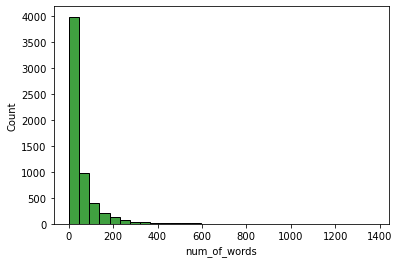

In [17]:
sns.histplot(data=dataset_pos_only, x='num_of_words',bins=30,color='green')

In [18]:
dataset_neg_only['num_of_words'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    7580.000000
mean       83.003298
std       129.645784
min         1.000000
1%          2.000000
10%         7.000000
25%        15.000000
50%        39.000000
75%        94.250000
90%       202.000000
99%       649.000000
max      1506.000000
Name: num_of_words, dtype: float64

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_of_words', ylabel='Count'>

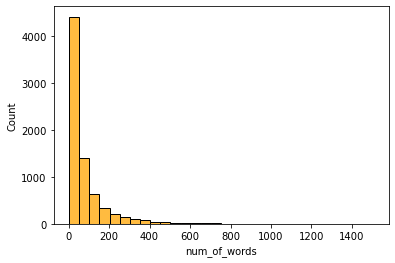

In [19]:
sns.histplot(data=dataset_neg_only, x='num_of_words',bins=30,color='orange')

The public dataset supports the distribution of the comments

- "Negative reviews are slightly longer than positive reviews, but the difference is negligible.". But seems the latter is not supported by the dataset we have.

- "Most games receive reviews with a median length of 205 characters, or 30 words.". The sentence is supported by the positive set and the overall dataset, but not on the negative set.

what if we remove comments less than 10 characters.

In [20]:
dataset_2 = dataset.copy()

dataset_2 = dataset_2[dataset_2['review_text'].str.len()>=10]

In [21]:
# first have all comments together

dataset_2['num_of_words'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    13386.000000
mean        72.868893
std        118.290993
min          1.000000
1%           3.000000
10%          7.000000
25%         14.000000
50%         33.000000
75%         81.000000
90%        175.000000
99%        586.650000
max       1506.000000
Name: num_of_words, dtype: float64

In [22]:
dataset_2_pos_only = dataset_2[dataset_2['review_score'] == 1]
dataset_2_neg_only = dataset_2[dataset_2['review_score'] == 0]

In [23]:
# describe the characteristics of the number of words

dataset_2_pos_only['num_of_words'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    5877.000000
mean       58.932959
std        99.649667
min         1.000000
1%          2.000000
10%         6.000000
25%        11.000000
50%        26.000000
75%        64.000000
90%       139.000000
99%       494.680000
max      1371.000000
Name: num_of_words, dtype: float64

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_of_words', ylabel='Count'>

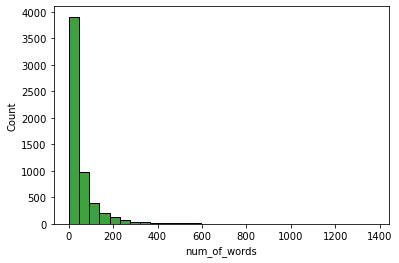

In [24]:
sns.histplot(data=dataset_2_pos_only, x='num_of_words',bins=30,color='green')

In [25]:
dataset_2_neg_only['num_of_words'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    7509.000000
mean       83.776002
std       130.012390
min         1.000000
1%          3.000000
10%         8.000000
25%        15.000000
50%        40.000000
75%        95.000000
90%       204.000000
99%       649.000000
max      1506.000000
Name: num_of_words, dtype: float64

In [26]:
# select some text for sample

# dataset_2_neg_only[dataset_2_neg_only['num_of_words']==645].iloc[0]['review_text']

IndexError: single positional indexer is out-of-bounds

In [27]:
for index, row in dataset_2_pos_only[dataset_2_pos_only['num_of_words'] > 512].sample(n=5).iterrows():
    print("\""+ row['review_text']+ "\",")
    print()

"Horribly balanced an uninspired versus modes, if you're looking to make war on other people's faces, look elsewhere.  The Co-op however is very fun, with easily understood class mechanics and a decidedly old school feel. You might fail a mission a few times, but the game rewards learning encounters, and moves each mission up a difficulty level each day. The missions are cycled out at the top level of difficulty (hardcore) and a new mission enters the rotation at the bottom level (regular)  As free to play models go, there's decent progression to be had, and unlike a lot of similar games you're not forced to rent guns on a timer, but rather your equipped permanent weapons take durability damage. As long as you're consistantly winning at least half of the mission on skilled or higher difficulty, you end up with enough cash to repair your equipped gear and make a profit you can use to buy better stuff.  The shooting mechanics are solid, the guns feel meaty and worthwhile, and the sidearm

In [28]:
for index, row in dataset_2_neg_only[dataset_2_neg_only['num_of_words'] > 512].sample(n=5).iterrows():
    print("\""+ row['review_text']+ "\",")
    print()

"I have looked for this game for ages. I played a demo a long time ago and remembered the gameplay fondly, but all I could remember was that it was some kind of Fairy RPG with a female protaganist. Some research eventually led me to Zanzarah and I thought, 'THIS IS IT!!! OH MY GOD, I FOUND IT!!!'  Unfortunately, I cannot recommend the game in its current state. To begin with, anybody who says they have trouble moving or anything control related is clearly attempting to use WASD controls. This is an old game. Very old. So old it does not use WASD. It uses the Arrow Keys. As a leftie, I had no problems starting this game.  I have an Nvidia graphics card and started up the game on the highest possible settings. Immediately I grew concerned. The menu was extremely laggy and nothing I did seemed to change that. Oh well, I thought, I'll just dive in, maybe it's just to do with the menu. I was proven....... sort of right? Upon loading up the game, I thought, 'Graphics are a bit meh, but this 

/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_of_words', ylabel='Count'>

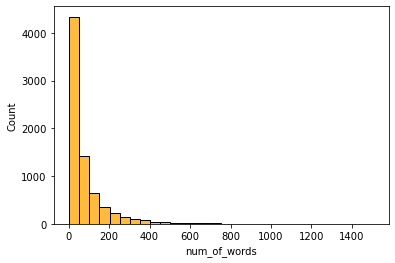

In [29]:
sns.histplot(data=dataset_2_neg_only, x='num_of_words',bins=30,color='orange')

Distribution of words in all review texts

We will perform that with stopwords and w/out stopwords

In [30]:
dataset['list_words'] = dataset['review_text'].apply(lambda x:str(x).split())

In [31]:
top = Counter([item for sublist in dataset['list_words'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,39106
1,to,25012
2,and,24558
3,a,23722
4,of,17884
5,is,16986
6,I,16427
7,game,15949
8,you,14010
9,it,12632


In [32]:
# create a dataset with cleaning performed

dataset_cleaned = dataset.copy(deep=True)

In [33]:
# clean basic characters
def clean(raw):
    """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

In [34]:
# remove numerics (maybe not required in BERT)
def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

In [35]:
# remove emojis
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [36]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

In [37]:
# remove special symbols
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

In [38]:
# remove punctuation (just for analysis, maybe not required in BERT)
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

### remove stopwords

Stopwords are words that occur frequently in a language and are often grammatical in nature, such as articles (e.g., "the," "a"), prepositions (e.g., "in," "on"), conjunctions (e.g., "and," "but"), and pronouns (e.g., "he," "she"). These words are necessary for constructing sentences and conveying grammatical structure, but they often do not contribute much to the overall meaning of the text.

- noise reduction
- Improved Analysis Accuracy
- faster processing

In [39]:
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer

stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

### use stemming to normalize words

Reduce the words to its stem to reduce dimension.
e.g. 

cared ----> care

university ----> univers

fairly ----> fair

easily ----> easili

singing ----> sing

sings ----> sing

sung ----> sung

singer ----> singer

sportingly ----> sport

In [40]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
def stemming(text):
   stem=[]
   # stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

In [41]:
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(stemming)

In [42]:
cleaning(dataset_cleaned,'review_text')

In [43]:
dataset_cleaned['list_words'] = dataset_cleaned['review_text'].apply(lambda x:str(x).split())

In [44]:
top2 = Counter([item for sublist in dataset_cleaned['list_words'] for item in sublist])
temp2 = pd.DataFrame(top2.most_common(20))
temp2.columns = ['Common_words','count']
temp2.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,26151
1,play,7252
2,like,5409
3,get,4614
4,time,3654
5,one,3412
6,good,3227
7,realli,3049
8,fun,2797
9,even,2777


/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Common_words'>

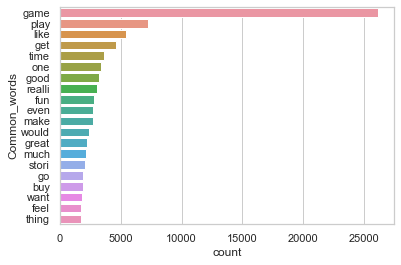

In [45]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp2)

If we break into positive and negative comments...

In [46]:
dataset_cleaned_pos_only = dataset_cleaned[dataset_cleaned['review_score'] == 1]
dataset_cleaned_neg_only = dataset_cleaned[dataset_cleaned['review_score'] == 0]

In [47]:
top3 = Counter([item for sublist in dataset_cleaned_pos_only['list_words'] for item in sublist])
temp3 = pd.DataFrame(top3.most_common(20))
temp3.columns = ['Common_words','count']
temp3.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,9961
1,play,2960
2,like,1979
3,get,1534
4,fun,1504
5,good,1468
6,one,1441
7,great,1411
8,time,1283
9,realli,1128


/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Common_words'>

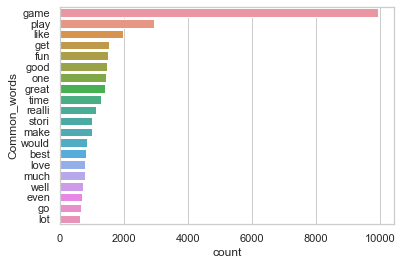

In [48]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp3)

In [49]:
top4 = Counter([item for sublist in dataset_cleaned_neg_only['list_words'] for item in sublist])
temp4 = pd.DataFrame(top4.most_common(20))
temp4.columns = ['Common_words','count']
temp4.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,16190
1,play,4292
2,like,3430
3,get,3080
4,time,2371
5,even,2067
6,one,1971
7,realli,1921
8,good,1759
9,make,1724


/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michaelcheng/miniforge3/envs/fyp-test/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Common_words'>

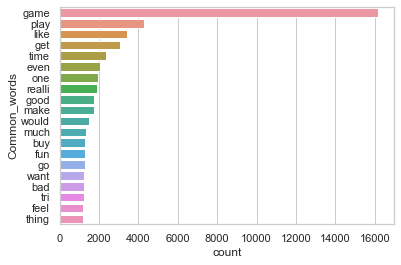

In [50]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp4)

what are the common words appeared in both top 20?

In [51]:
temp5 = pd.merge(temp3,temp4, how='inner', on=['Common_words'])

In [52]:
temp5

,Common_words,count_x,count_y
0,game,9961,16190
1,play,2960,4292
2,like,1979,3430
3,get,1534,3080
4,fun,1504,1293
5,good,1468,1759
6,one,1441,1971
7,time,1283,2371
8,realli,1128,1921
9,make,1005,1724


looks almost the same as the overall dataset, as the positive comments are very domainant...

Due to hardware limitation, we will create a balanced dataset by randomly sampling positive comments in training

There are different methods in randomly selecting samples, yet the difference in performance are not significant (~0.01 in accuracy)  
E.g.: https://ruslanmv.com/blog/How-to-handle-imbalanced-text-data-in-Natural-Language-Processing

The undersampler in imbalanced-learning package will be applied on the training set

Then we may scrap new comments for validation on recent comments :D